In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'housingData-Real.csv', 'HousingProject.ipynb']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('housingData-Real.csv')

In [5]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
#Select your columns
livingspace = dataset['sqft_living']
price = dataset['price']

In [17]:
#Convert livingspace into 2d matrix
X = np.array(livingspace).reshape(-1,1)

In [18]:
#Convert price to 2d matrix
y = np.array(price)

In [19]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [20]:
#Convert the data into test and training
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [23]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#CREATE A PREDICTOR 
predictor = regressor.predict(X_test)

In [25]:
predictor

array([ 540850.25152261, 1014467.47794551,  477605.02433565, ...,
        572617.26061195,  318481.18789722,  191413.15153986])

In [26]:
#This prediction is more helpful with graphs

Text(0,0.5,'Price')

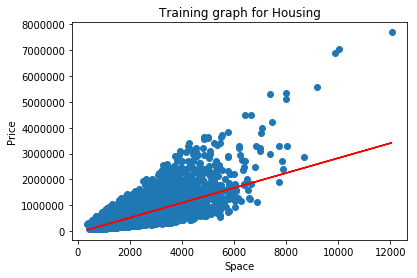

In [35]:
#Plot for training dataset
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train),color='red')
plt.title("Training graph for Housing")
plt.xlabel('Space')
plt.ylabel('Price')

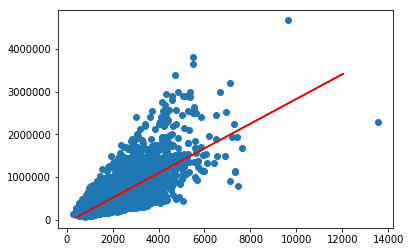

In [32]:
#Plot for test dataset
plt.scatter(X_test,y_test)
plt.plot(X_train, regressor.predict(X_train), color='red')